In [ ]:
# doubts for the doubt clarification session
# 1. what is the target column? -- Price_2
# 2. what is the order values? -- Price_2 = 2 and sum of price values
# 3. how do i differentiate between the items the customer viewed and the order they actually made? -- Price_2 = 1 (viewed) and 2 (bought)
# 4. how do i identify the users? as the session id is unique and not repeated - check again

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv("D:\\GIT HUB\\GUVI Mini Proj 4\\train_data - train_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [ ]:
# doubts for the doubt clarification session
# 1. what is the target column? -- Price_2
# 2. what is the order values? -- Price_2 = 2 and sum of price values
# 3. how do i differentiate between the items the customer viewed and the order they actually made? -- Price_2 = 1 (viewed) and 2 (bought)
# 4. how do i identify the users? as the session id is unique and not repeated - check again

In [4]:
data.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [ ]:
# key insights that we can find from the given data:
# 1.relationship of each column with the target column - price amd price 2 -- target column will be discussed in the doubt clarification session
# doubt clarification session - 22nd oct
# 2.Time series - more/ number of clicks per session  ; which country bought the most on which; 
# how many session per d, m; most revenue generated d,m, sessions and the clicks made;
# most purchased model, most visited model, - days and months and weeks
# 3.which part of the screen is 1st viewed/clicked, which part of the screen is most clicked, 
# which part of the screen is last clicked ; which page captured the most and least (h/l value) - for high valued orders, low valued orders
# 4.which country bouth which, which coloru, - category and model
# 5.which position of the page is clicked most - per page ; which page generate more revenue.
# 6.visualize which item is showed on which page and minimum clicks required to view the particular iteam - how much click it actually took to view the item 
# which generated move revenue ? most clicked or least clicked sessions? which model is popular and does the poplur item is priced above or below average? 
# what model did the user see before buying the item
# 7.count plot for visualization of the count of occurance of each item -- done

#Statistical graphs and interfrence:
# distribution graphs -
# box plot -
# Hpotheysis testing
# Colinearity 
# co-relation heat map
# skewness and kurtosis - done (a function to be return to confirm in numbers)
# outliers and anamoly detections
# 

#column types:
# Category: 
# page2_clothing_model
# page1_main_category
# colour
# location
# country	
# model_photography
# price_2
# page - it is continuous but just consider it as category for interpretation sake

# Continuous:
# page
# price
# order

# Time series:
# month
# day

# constant:
# year

# uniques:

# Target (dependent):

 

#Data understanding - observation
#no duplicates
#no null
#page2_clothing_model -only object type - rest all int
#Encoding required for : page2_clothing_model 

# will be using target encoding and frequency encoding for the page2_clothng_model column - refer one note



In [ ]:
# distribution graphs

Conitnuous Features

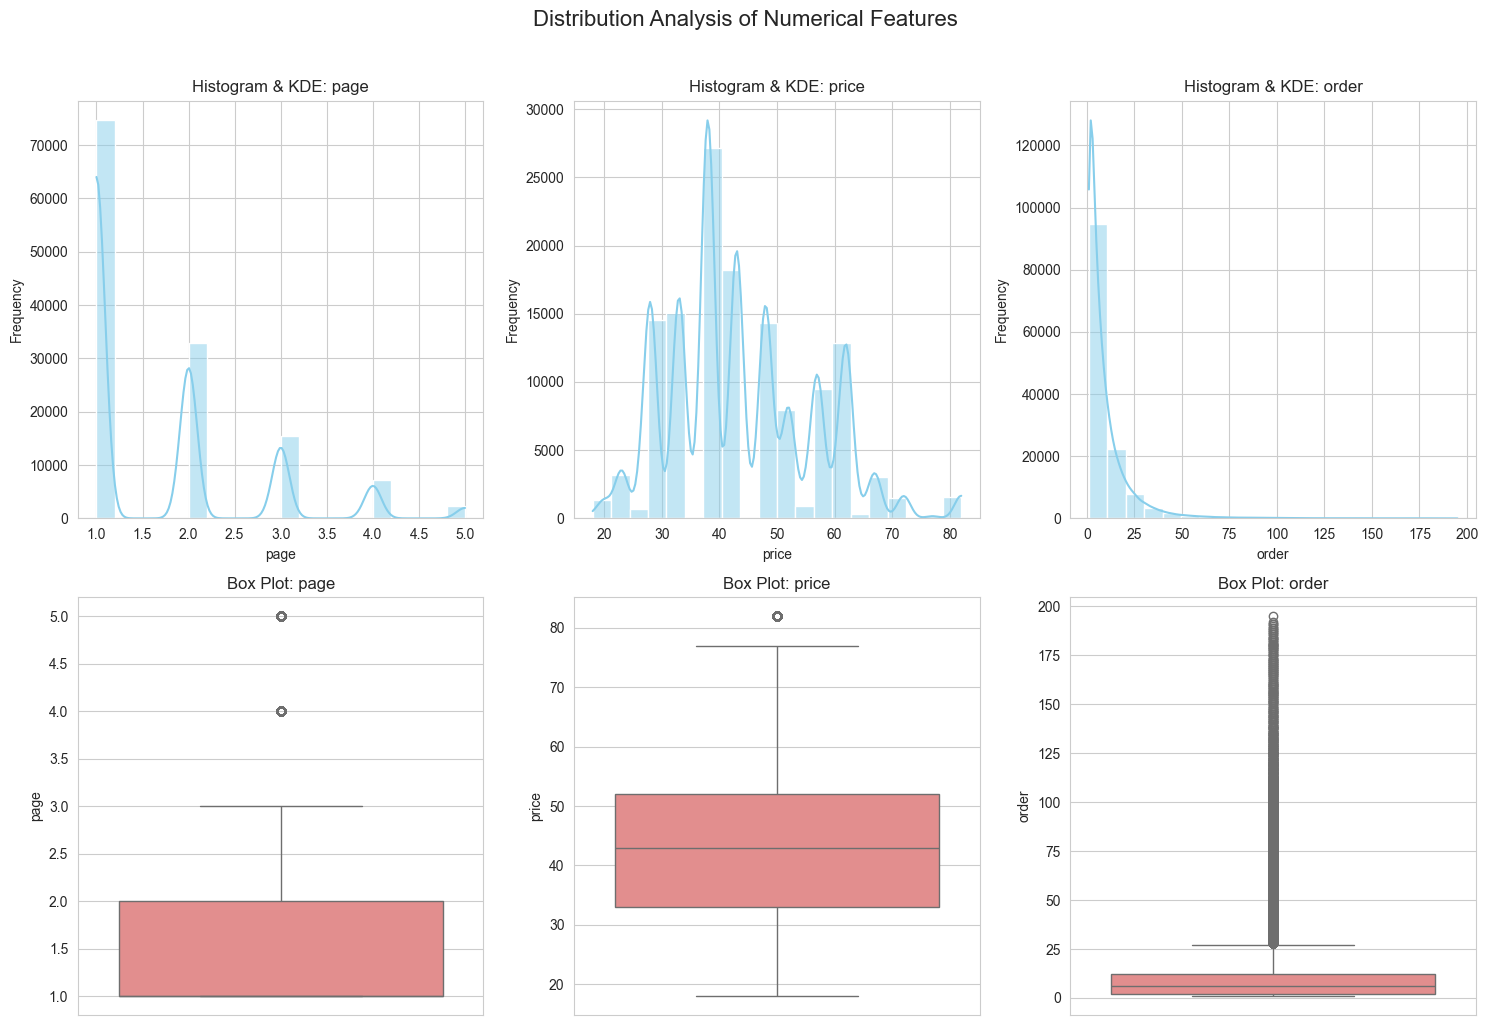

In [16]:
# List of numerical columns to plot (replace with your actual column names)
numerical_features = ['page', 'price','order']

# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution Analysis of Numerical Features', fontsize=16, y=1.02)

for i, col in enumerate(numerical_features):
    # Calculate subplot position (2 rows, 3 columns)
    
    # ------------------
    # HISTOGRAM (Row 1) - Shows the frequency/shape of the data
    # ------------------
    plt.subplot(2, len(numerical_features), i + 1)
    # The 'kde=True' overlay provides a smooth density estimate
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram & KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # ------------------
    # BOX PLOT (Row 2) - Shows the 5-number summary and outliers
    # ------------------
    plt.subplot(2, len(numerical_features), i + 1 + len(numerical_features))
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'Box Plot: {col}')
    plt.ylabel(col)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

Categorical Features

C:\Users\Hp\AppData\Local\Temp\ipykernel_18888\2689119486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis') # Using y=data[col] for horizontal bars to save space
C:\Users\Hp\AppData\Local\Temp\ipykernel_18888\2689119486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis') # Using y=data[col] for horizontal bars to save space
C:\Users\Hp\AppData\Local\Temp\ipykernel_18888\2689119486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis') # Us

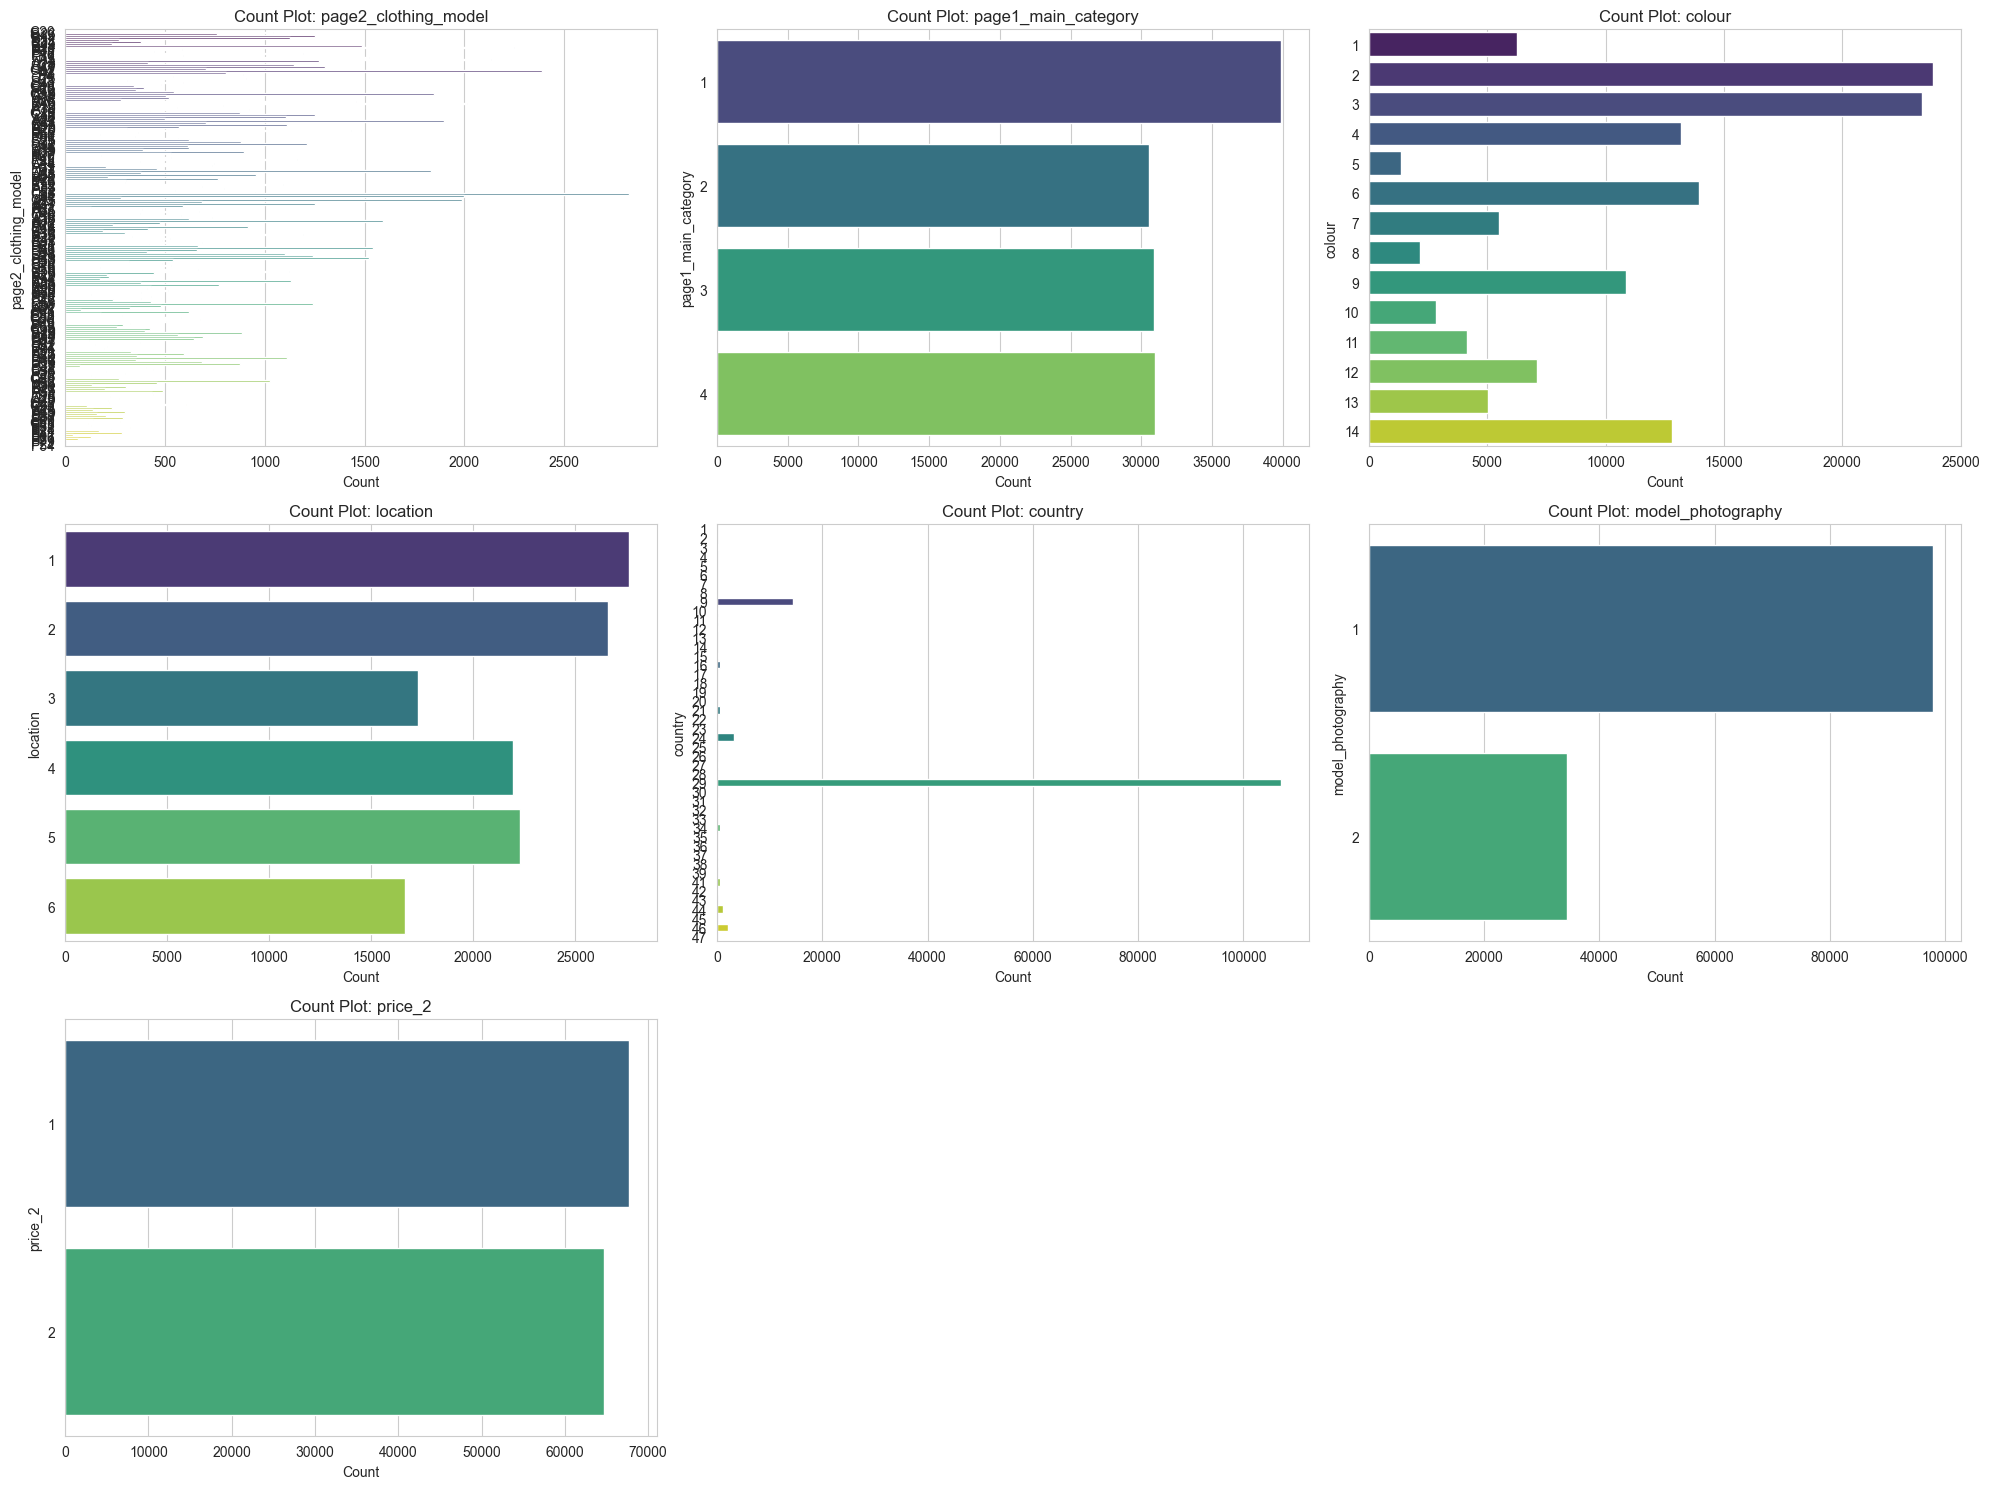

In [36]:
# List of Categorical columns to plot (replace with your actual column names)
Categorical_features = ['page2_clothing_model', 'page1_main_category', 'colour', 'location', 'country', 'model_photography', 'price_2']

# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
N = len(Categorical_features)
plt.figure(figsize=(20, 15)) # Increased size for better readability

for i, col in enumerate(Categorical_features):
    # Set up a 3x3 grid (N=7 features)
    plt.subplot(3, 3, i + 1)
    
    # Use sns.countplot for clear categorical frequency analysis
    sns.countplot(y=data[col], palette='viridis') # Using y=data[col] for horizontal bars to save space
    
    plt.title(f'Count Plot: {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

In [ ]:
count_model = data.groupby("page2_clothing_model").size().reset_index(name='count')
count_model.head()

In [22]:
fig = px.bar (
    count_model.sort_values(by='count', ascending= False), 
    x = 'page2_clothing_model', 
    y ='count', 
    title = 'most viewed model', 
    color = 'page2_clothing_model' , 
    template = 'plotly_white'
    )
fig.show()

Niche Visualization

C:\Users\Hp\AppData\Local\Temp\ipykernel_20176\815411175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cop['location'], palette='viridis')


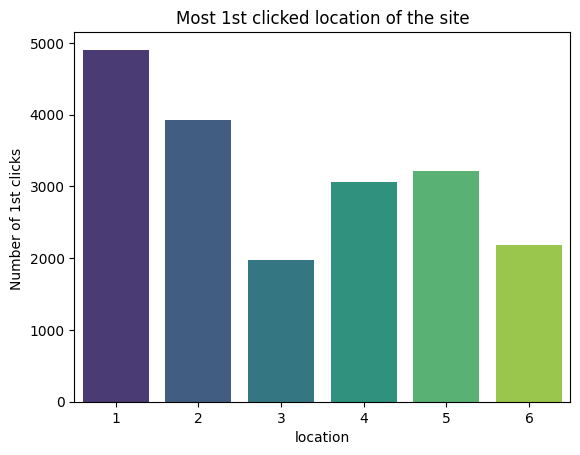

In [8]:
# which location of the screen is clicked 1st
data_cop = data[data['order'] == 1]
sns.countplot(x=data_cop['location'], palette='viridis')
plt.title('Most 1st clicked location of the site')
plt.ylabel('Number of 1st clicks ')
plt.xlabel('location')

# Adjust layout to prevent overlap and display the plots
# plt.tight_layout()
plt.show()

In [13]:
model_visit_count.max()

np.int64(2824)

C:\Users\Hp\AppData\Local\Temp\ipykernel_20176\3119832720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data_cop['model_visit_count'], x= data_cop['page2_clothing_model'], palette='viridis')


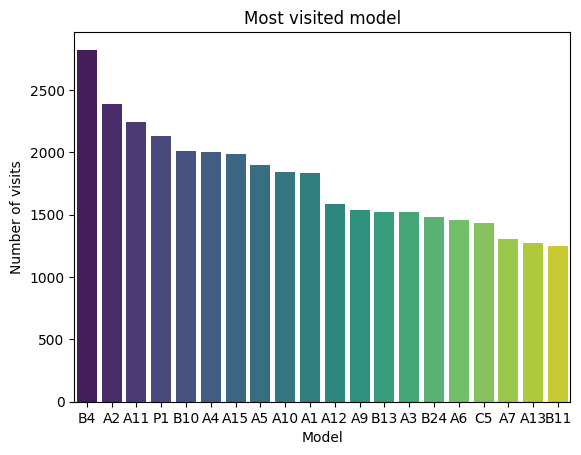

C:\Users\Hp\AppData\Local\Temp\ipykernel_20176\3119832720.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data_cop['model_visit_count'], x= data_cop['location'], palette='viridis')


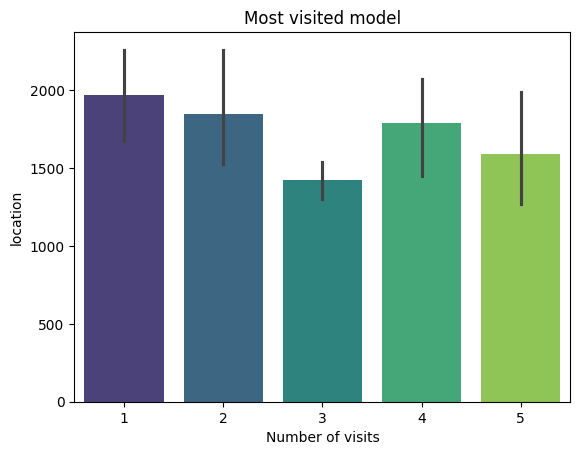

C:\Users\Hp\AppData\Local\Temp\ipykernel_20176\3119832720.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data_cop['page1_main_category'], palette='viridis')


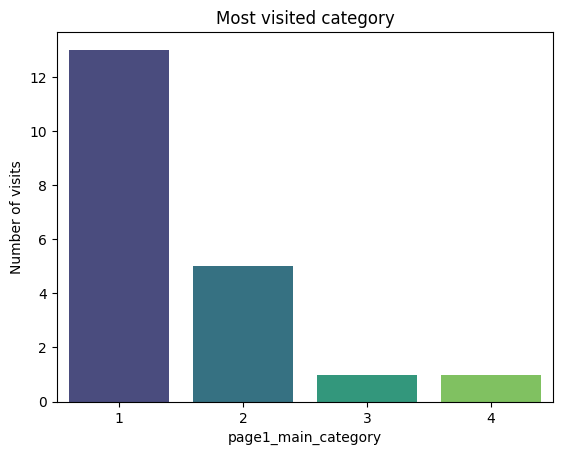

C:\Users\Hp\AppData\Local\Temp\ipykernel_20176\3119832720.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data_cop['colour'], palette='viridis')


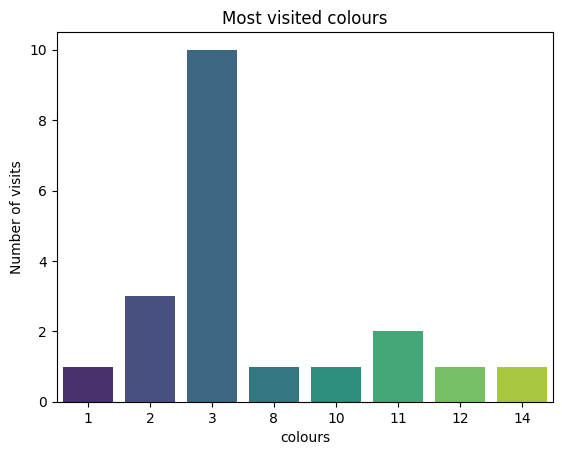

In [24]:
#top buyer
data_cop = data.copy()
# data_temp = data_cop.copy()
model_visit_count = data_cop['page2_clothing_model'].value_counts()
data_cop['model_visit_count'] = data_cop['page2_clothing_model'].map(model_visit_count)
data_cop.drop_duplicates(subset = ['page2_clothing_model'], inplace=True)
data_cop = data_cop.sort_values(by='model_visit_count', ascending= False).head(20)

sns.barplot(y=data_cop['model_visit_count'], x= data_cop['page2_clothing_model'], palette='viridis')
plt.title('Most visited model')
plt.ylabel('Number of visits')
plt.xlabel('Model')

# Adjust layout to prevent overlap and display the plots
# plt.tight_layout()
plt.show()

sns.barplot(y=data_cop['model_visit_count'], x= data_cop['location'], palette='viridis')
plt.title('Most visited model')
plt.xlabel('Number of visits')
plt.ylabel('location')
plt.show()

sns.countplot(x= data_cop['page1_main_category'], palette='viridis')
plt.title('Most visited category')
plt.ylabel('Number of visits')
plt.xlabel('page1_main_category')
plt.show()

sns.countplot(x= data_cop['colour'], palette='viridis')
plt.title('Most visited colours')
plt.ylabel('Number of visits')
plt.xlabel('colours')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_20176\3572690891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cop['session_visit_count'] = data_cop['session_id'].map(session_visit_count)
C:\Users\Hp\AppData\Local\Temp\ipykernel_20176\3572690891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cop.drop_duplicates(subset = ['session_id'], inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_20176\3572690891.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

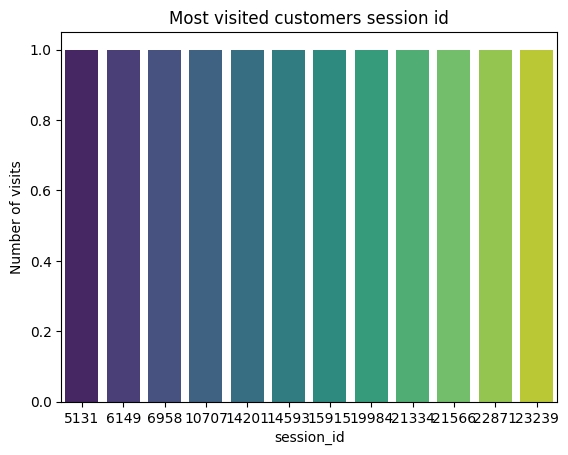

In [9]:
#top buyer
data_temp = data_cop.copy()
session_visit_count = data_cop['session_id'].value_counts()
data_cop['session_visit_count'] = data_cop['session_id'].map(session_visit_count)
data_cop.drop_duplicates(subset = ['session_id'], inplace=True)
data_cop = data_cop.sort_values(by='session_visit_count', ascending= False).head(12)

sns.countplot(x=data_cop['session_id'], palette='viridis')
plt.title('Most visited customers session id')
plt.ylabel('Number of visits')
plt.xlabel('session_id')

# Adjust layout to prevent overlap and display the plots
# plt.tight_layout()
plt.show()


End of niche Visualization

In [6]:
# data.duplicated().sum()
data.nunique()
#suma test
# data.isnull().sum()

year                        1
month                       5
day                        31
order                     193
country                    46
session_id              22910
page1_main_category         4
page2_clothing_model      216
colour                     14
location                    6
model_photography           2
price                      20
price_2                     2
page                        5
dtype: int64